In [ ]:
#Question 1
import os
from google.colab import files
uploaded=files.upload()
!unzip News.zip

Saving News.zip to News.zip
Archive:  News.zip
   creating: News/
  inflating: News/1.txt              
  inflating: News/10.txt             
  inflating: News/100.txt            
  inflating: News/1000.txt           
  inflating: News/1001.txt           
  inflating: News/1002.txt           
  inflating: News/1003.txt           
  inflating: News/1004.txt           
  inflating: News/1005.txt           
  inflating: News/1006.txt           
  inflating: News/1007.txt           
  inflating: News/1008.txt           
  inflating: News/1009.txt           
  inflating: News/101.txt            
  inflating: News/1010.txt           
  inflating: News/1011.txt           
  inflating: News/1012.txt           
  inflating: News/1013.txt           
  inflating: News/1014.txt           
  inflating: News/1015.txt           
  inflating: News/1016.txt           
  inflating: News/1017.txt           
  inflating: News/1018.txt           
  inflating: News/1019.txt           
  inflating: News/102.

In [ ]:
import os 
from TextPreprocessing import clean 
import pandas as pd 
from nltk.stem.snowball import SnowballStemmer
import umap
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
f=[open(r"News/"+i) for i in os.listdir(r"News/")]
documents=[]
for i in range(len(f)):
  try:
    documents.append(f[i].read())
  except:
    print("Extraction of",f[i],"failed.")

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
corpus=[]
stemmer = SnowballStemmer("english")
for i in range(len(documents)):
    Clean=clean(documents[i])
    stem_clean=list(map(stemmer.stem,Clean.split()))
    cleaned_file=' '.join(stem_clean)
    corpus.append(cleaned_file)
   
    

In [ ]:
table=pd.DataFrame(index=[i for i in range(len(documents))])
table['Original']=documents
table['cleaned version']=corpus

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)
X = vectorizer.fit_transform(table['cleaned version'])
dictionary = vectorizer.get_feature_names()

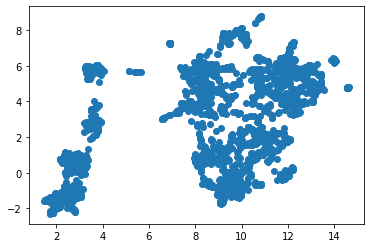

In [ ]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(X)
plt.scatter(standard_embedding[:,0],standard_embedding[:,1])


In [ ]:
from sklearn.decomposition import TruncatedSVD
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100)
lsa = svd_model.fit_transform(X)


In [ ]:
from sklearn.decomposition import TruncatedSVD
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100)
lsa = svd_model.fit_transform(X)


In [ ]:
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2","topic_3","topic_4","topic_5"])
topic_encoded_df["documents"] = table['cleaned version']
display(topic_encoded_df)

,topic_1,topic_2,topic_3,topic_4,topic_5,documents
0,0.098507,-0.036474,-0.078417,-0.017500,0.092296,lufthansa fli back profit german airlin luftha...
1,0.059458,-0.058473,0.061646,-0.062107,0.018494,nadal march mexico rafael nadal continu run fi...
2,0.106683,-0.083120,0.089790,0.122425,0.011343,brando reject godfath role late film star marl...
3,0.115489,-0.047640,-0.066244,-0.014720,0.065436,ail eurodisney vow turnaround eurodisney europ...
4,0.176657,-0.177844,0.253213,0.412803,0.122432,bafta hand movi honour movi star across globe ...
...,...,...,...,...,...,...
2219,0.206885,0.035656,-0.104955,-0.037219,0.116883,us rule yuko refug call yuko said us bankruptc...
2220,0.181410,0.088934,0.013571,0.007022,0.001609,abba toler attack palestinian leader mahmoud a...
2221,0.187708,-0.160309,0.193985,-0.187472,0.006609,year rememb irish use one sublimin moment year...
2222,0.172853,-0.121362,0.134828,-0.123591,-0.044432,real finish abandon match real madrid real soc...


In [ ]:
encoding_matrix = pd.DataFrame(svd_model.components_, index = ["topic_1", "topic_2","topic_3","topic_4","topic_5"], columns = (dictionary)).T
encoding_matrix.sort_values(by=["topic_1"], inplace=True, ascending=False)
top_5=[]
top_5.append(encoding_matrix.index[:5])
print('Top 5 terms for topic one is', top_5)

Top 5 terms for topic one is [Index(['said', 'mr', 'year', 'labour', 'peopl'], dtype='object')]


In [ ]:
encoding_matrix.sort_values(by=["topic_2"], inplace=True, ascending=False)
top=[]
top.append(encoding_matrix.index[:5])
print('Top 5 terms for topic 2 is', top)

Top 5 terms for topic 2 is [Index(['mr', 'labour', 'elect', 'blair', 'parti'], dtype='object')]


In [ ]:
encoding_matrix.sort_values(by=["topic_3"], inplace=True, ascending=False)
top5=[]
top5.append(encoding_matrix.index[:5])
print('Top 5 terms for topic 3 is', top5)

Top 5 terms for topic 3 is [Index(['film', 'best', 'award', 'win', 'play'], dtype='object')]


In [ ]:
encoding_matrix.sort_values(by=["topic_4"], inplace=True, ascending=False)
topp=[]
topp.append(encoding_matrix.index[:5])
print('Top 5 terms for topic 4 is', topp)

Top 5 terms for topic 4 is [Index(['film', 'award', 'best', 'oscar', 'nomin'], dtype='object')]


In [ ]:
encoding_matrix.sort_values(by=["topic_5"], inplace=True, ascending=False)
topo=[]
topo.append(encoding_matrix.index[:5])
print('Top 5 terms for topic 5 is', topo)

Top 5 terms for topic 5 is [Index(['economi', 'growth', 'rate', 'bank', 'econom'], dtype='object')]


In [ ]:
#Question Number 2 
def LSA(k, X):
    X_clean = list(map(clean,X))
    X_preprocessed=[]
    for sent in X_clean:
        X_preprocessed.append(" ".join(stemmer.stem(w) for w in sent.split()))
    vectorizer = TfidfVectorizer(smooth_idf=True, max_features=1000) 
    X_transformed = vectorizer.fit_transform(X_preprocessed)
    feature_count = len(vectorizer.get_feature_names())
    if k>feature_count:
         k = feature_count-1
    svd = TruncatedSVD(n_components=k, algorithm='randomized', n_iter=300, random_state=122)
    lsa = svd.fit_transform(X_transformed)
    Sigma = svd.singular_values_
    column_names = ["Topic {}".format(str(i+1)) for i in range(lsa.shape[1])]
    document_topic_matrix = pd.DataFrame(lsa,columns=column_names) 
    document_topic_matrix["Document"] = X 
    document_topic_matrix["Position"] = [i for i in range(len(X))] 
    dic = vectorizer.get_feature_names()
    term_topic_matrix = pd.DataFrame(svd.components_, index = column_names, columns = (dic)).T
    return k,Sigma, lsa, document_topic_matrix, term_topic_matrix

def percent_sigma(Sigma, X):
    agg = sum(Sigma)
    return (Sigma/agg)*len(X)

def summarize(k,sigma, document_term):
    summary = []
    sigma*= len(sigma)
    sigma = sigma.astype(int)
    column_names = ["Topic {}".format(str(i+1)) for i in range(k)] 
    for i in range(len(column_names)):
        num_sent = sigma[i]
        topic = column_names[i]
        document_term.sort_values(by = topic,inplace=True)
        document_term.reset_index(inplace=True) 
        document_term.drop(columns = ["index"],inplace=True) 
        for j in range(num_sent):
             if document_term["Document"][j] not in summary:
                  summary.append((document_term["Document"][j],document_term["Position"][j])) 
        summary.sort(key = lambda x: x[1])
    sent = [i[0] for i in summary]
    return " ".join(sent)

In [ ]:
docs=[]
for i in documents:
  sentences=nltk.tokenize.sent_tokenize(i)
  docs.append(sentences)

summary_full=[]  
for i in range(len(docs)):
    k,Sigma,lsa,document_topic_matrix, term_topic_matrix=LSA(2,docs[i])
    per=percent_sigma(Sigma,docs[i])
    summary=summarize(k, Sigma, document_topic_matrix)
    summary_full.append(summary)

display(summary_full)

['In a preliminary report, the airline announced net profits of 400m euros ($527.61m; £274.73m), compared with a loss of 984m euros in 2003. Operating profits were at 380m euros, ten times more than in 2003. It was also hit by troubles at its US catering business. The company said that it will give all the details of its 2004 results on 23 March.',
 "Nadal marches on in Mexico\n\nRafael Nadal continued his run of fine form to beat Guillermo Canas and reach the Mexican Open semis in Acapulco. Czech fifth seed Czech Jiri Novak was eliminated 7-5 6-1 by Agustin Calleri. Argentina's Agustin Calleri beat fourth seed Jiri Novak 7-5 6-1 in a battle of former champions at the Mexican Open. Calleri won his only ATP title in Acapulco two years ago while Novak won the singles and doubles titles in 1998.",
 'The actor\'s friend Budd Schulberg told Vanity Fair magazine that Brando\'s assistant suggested he read the novel. The actor sent a young woman dressed in Native American costume to refuse the

In [ ]:
!pip install rake-nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=3155a1e291d5537fd64b5ebbcd795c71338393858ec771e2458f58f676a2ec52
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [ ]:
from rake_nltk import Rake
r = Rake()
docsss=[]
for doc in documents: 
    r.extract_keywords_from_text(doc) 
    rake_count_total = len(r.get_ranked_phrases()) 
    docsss.append(rake_count_total)
print(rake_count_total)
    
sumk=[]
for doc in summary_full: 
    r.extract_keywords_from_text(doc) 
    rake_count_total = len(r.get_ranked_phrases())
    sumk.append( rake_count_total) 
print(rake_count_total)
    
docs_2=[]
for i in documents:
  sentences=nltk.tokenize.sent_tokenize(i)
  docs_2.append(len(sentences))
print(len(sentences))

sums=[]
for i in summary_full:
  sent=nltk.tokenize.sent_tokenize(i)
  sums.append(len(sent))
print(len(sent))

109
19
20
4


In [ ]:
summary_score=[]
for i in range(0,2224):
  sum_score= float((sumk[i]/docsss[i])*(docs_2[i]-sums[i])/docs_2[i])
  summary_score.append(sum_score)

import statistics
avg= statistics.mean(summary_score)
print(avg)

0.17833764916346642


In [ ]:
#Question Number 3
import gensim.downloader as api
from gensim.models import Word2Vec
import logging
from sklearn.cluster import KMeans

In [ ]:
logging.basicConfig(
    format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO
)
corpus1 = api.load('text8')
corpus2 = api.load('20-newsgroups')

2020-06-01 07:04:38,849 : INFO : Creating /root/gensim-data


[==================================================] 100.0% 31.6/31.6MB downloaded


2020-06-01 07:04:45,881 : INFO : text8 downloaded


[==================================================] 100.1% 13.8/13.8MB downloaded


2020-06-01 07:04:49,551 : INFO : 20-newsgroups downloaded


In [ ]:
model = Word2Vec(min_count=5, size=200, iter=10)
model.build_vocab(corpus1)
model.train(corpus1, total_examples=model.corpus_count, epochs=model.epochs)
model.build_vocab(corpus2, update=True)
model.train(corpus2, total_examples=model.corpus_count, epochs=model.epochs)

2020-06-01 07:05:01,182 : INFO : collecting all words and their counts
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-06-01 07:05:01,193 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-01 07:05:07,736 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2020-06-01 07:05:07,737 : INFO : Loading a fresh vocabulary
2020-06-01 07:05:08,187 : INFO : effective_min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2020-06-01 07:05:08,190 : INFO : effective_min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2020-06-01 07:05:08,507 : INFO : deleting the raw count

(50641, 753840)

In [ ]:
import os
from google.colab import files
uploaded=files.upload()

Saving BuzzWords.txt to BuzzWords.txt


In [ ]:
with open("BuzzWords.txt") as text:
    lines = [i.strip() for i in text.readlines()]

In [ ]:
sim_matrix = []
for idx, i in enumerate(lines):
    sim_matrix.append([])
    for j in lines:
        try:
            sim_matrix[idx].append(model.wv.similarity(i,j)**2)
        except:
            sim_matrix[idx].append(0)

check = pd.DataFrame(sim_matrix, columns=lines, index=lines)
check

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,food,champion,hunger,gadget,winner,wildlife,fitness,sport,greenery,healthy,chip,nature,information,dish,cuisine,trees,party,flowers,vote,election,active,serene,smart,debate,campaign,restaurant,tasty,politics,tech,computer
food,1.000000e+00,2.980275e-02,0.067996,6.544564e-07,0.008947,0.158116,0.043125,0.050300,0.032651,0.170639,1.097075e-03,0.011261,0.104229,0.175668,0.191815,0.164978,0.002204,0.129109,0.005740,0.000547,0.007700,0.003815,0.016782,2.400849e-03,0.000107,0.105425,0.045704,0.000288,0.020459,0.007567
champion,2.980275e-02,1.000000e+00,0.004833,4.669161e-03,0.298265,0.004114,0.000281,0.112963,0.000830,0.026564,7.198905e-07,0.009276,0.044903,0.003972,0.009684,0.028208,0.018623,0.020120,0.022075,0.063291,0.000184,0.002889,0.002422,9.316186e-07,0.031711,0.000653,0.008616,0.023200,0.001770,0.001761
hunger,6.799650e-02,4.833494e-03,1.000000,6.175979e-03,0.000615,0.049837,0.069508,0.009118,0.050750,0.135595,2.072438e-02,0.031081,0.005327,0.005941,0.000011,0.019521,0.000723,0.048581,0.003468,0.005260,0.000199,0.027301,0.017997,1.271320e-03,0.048462,0.001506,0.020591,0.000788,0.005669,0.009295
gadget,6.544564e-07,4.669161e-03,0.006176,1.000000e+00,0.000129,0.000342,0.021286,0.006669,0.029882,0.000409,6.871573e-02,0.008462,0.013041,0.008892,0.002958,0.000055,0.024140,0.005382,0.043567,0.035708,0.006866,0.044791,0.121229,3.596632e-03,0.000094,0.063150,0.024615,0.003751,0.036740,0.091145
winner,8.946524e-03,2.982648e-01,0.000615,1.286689e-04,1.000000,0.001220,0.000792,0.069739,0.009747,0.008140,7.134368e-03,0.018988,0.002794,0.000152,0.011087,0.035512,0.049736,0.008398,0.148378,0.094874,0.003213,0.015132,0.006645,2.588743e-04,0.012607,0.000085,0.000021,0.000483,0.003540,0.002895
wildlife,1.581164e-01,4.113920e-03,0.049837,3.415721e-04,0.001220,1.000000,0.068907,0.092440,0.045371,0.092935,2.431897e-02,0.010590,0.020616,0.065207,0.077557,0.166347,0.000002,0.095803,0.002185,0.004198,0.016145,0.004410,0.013282,3.483921e-04,0.003953,0.073724,0.015792,0.006736,0.033318,0.003473
fitness,4.312542e-02,2.809640e-04,0.069508,2.128638e-02,0.000792,0.068907,1.000000,0.130135,0.000341,0.214439,4.285776e-03,0.088131,0.033846,0.009898,0.000006,0.002158,0.000304,0.001922,0.001300,0.000015,0.014808,0.022236,0.044266,7.534527e-03,0.000590,0.004320,0.004329,0.028060,0.066810,0.038622
sport,5.030045e-02,1.129628e-01,0.009118,6.668512e-03,0.069739,0.092440,0.130135,1.000000,0.000260,0.028781,1.296372e-02,0.007919,0.002488,0.112260,0.104773,0.007871,0.023573,0.003134,0.008227,0.009075,0.047051,0.017318,0.017029,4.209908e-02,0.024956,0.077381,0.000050,0.041456,0.049431,0.018698
greenery,3.265105e-02,8.303554e-04,0.050750,2.988207e-02,0.009747,0.045371,0.000341,0.000260,1.000000,0.045145,2.215504e-03,0.000002,0.004780,0.041191,0.024497,0.090995,0.002193,0.193782,0.027073,0.025397,0.005686,0.054317,0.055630,2.751667e-02,0.030473,0.043680,0.210126,0.006767,0.009557,0.000362
healthy,1.706393e-01,2.656363e-02,0.135595,4.091283e-04,0.008140,0.092935,0.214439,0.028781,0.045145,1.000000,1.870343e-02,0.035849,0.001635,0.009178,0.016675,0.102751,0.007160,0.110720,0.000012,0.018063,0.077268,0.042937,0.081461,1.758488e-03,0.032956,0.010013,0.114463,0.005497,0.006518,0.000554


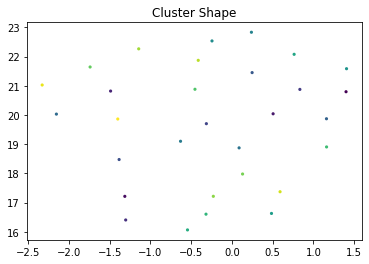

In [ ]:
X = [model.wv[word] for word in lines]
embedding = umap.UMAP(n_neighbors=10, min_dist=0.5, random_state=12, metric = "cosine").fit_transform(X)  
plt.title("Cluster Shape")
plt.scatter(embedding[:, 0], embedding[:, 1], c = [(i+1) for i in range(len(sim_matrix))],s = 10, edgecolor='none')

In [ ]:
cluster = KMeans(n_clusters=8).fit(sim_matrix)
cluster.labels_

array([0, 6, 5, 1, 6, 3, 5, 0, 7, 5, 1, 4, 4, 0, 0, 3, 2, 3, 2, 2, 5, 7,
       1, 4, 2, 0, 7, 4, 1, 1], dtype=int32)

In [ ]:
for i in range(8):
    for idx, j in enumerate(cluster.labels_):
        if j == i:
            print(lines[idx])
    print()

food
sport
dish
cuisine
restaurant

gadget
chip
smart
tech
computer

party
vote
election
campaign

wildlife
trees
flowers

nature
information
debate
politics

hunger
fitness
healthy
active

champion
winner

greenery
serene
tasty

